In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from owcsimpy.geoutils.draw import draw
from owcsimpy.geoobjects.bases.vector_py import Vector_py as Vector
from owcsimpy.geoobjects.bases.paramline_py import ParamLine_py as Line
from owcsimpy.geoobjects.bases.circle_py import Circle_py as Circle
from owcsimpy.geoobjects.bases.rectplane_py import RectPlane_py as RectPlane
from owcsimpy.geoobjects.bases.cube_py import Cube_py as Cube

from JSAnimation.IPython_display import display_animation
from matplotlib import animation



<IPython.core.display.Javascript object>


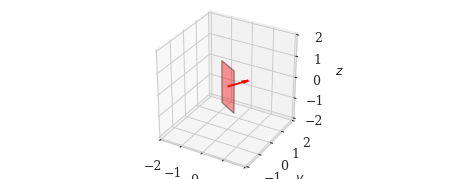

In [3]:
polar, az, Rod, translation = 90, 60, 0, 0;

v = Vector(np.array([1,np.deg2rad(polar),np.deg2rad(az)]))
ctrPoint=np.array(3*[translation])
plane = RectPlane(normalVect=v,ctrPoint=ctrPoint,
    RodriguesAngle=np.deg2rad(Rod),dimensions=[2,1])

fig,ax = draw(figsize=(5,2),xlim=[-2,2],ylim=[-2,2],zlim=[-2,2],
             planes=plane)

<IPython.core.display.Javascript object>


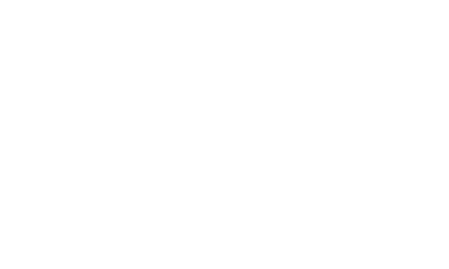


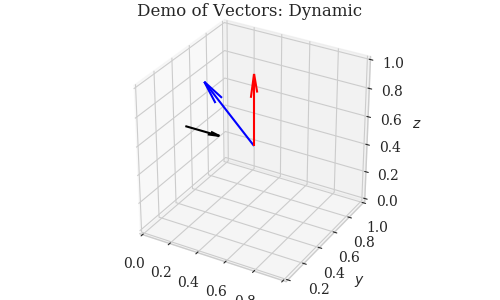
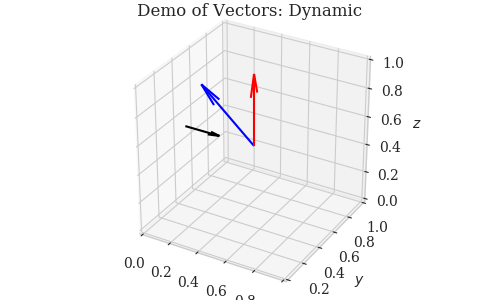
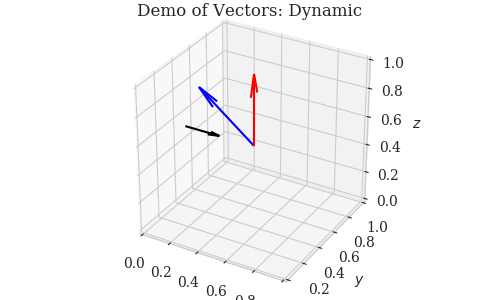
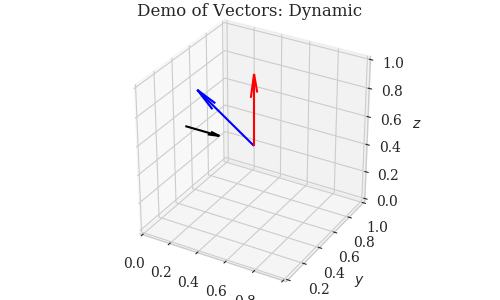
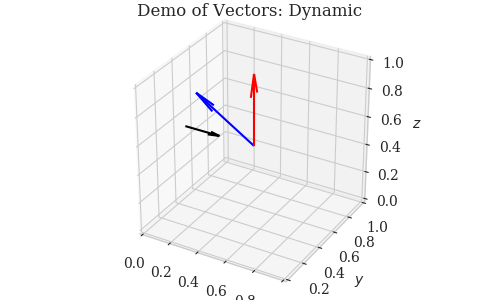
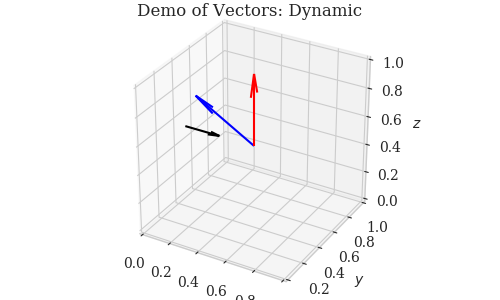
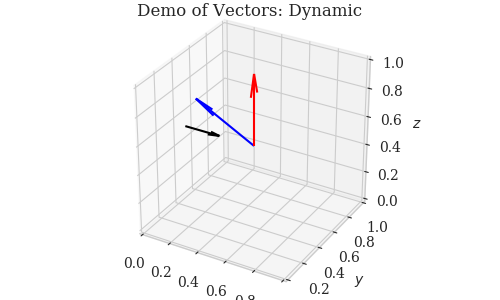
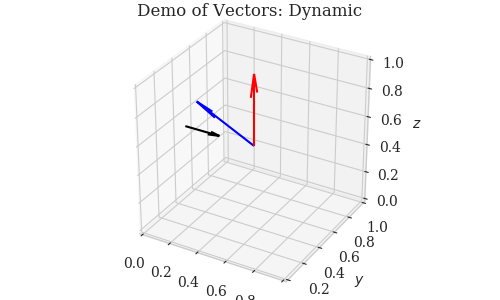
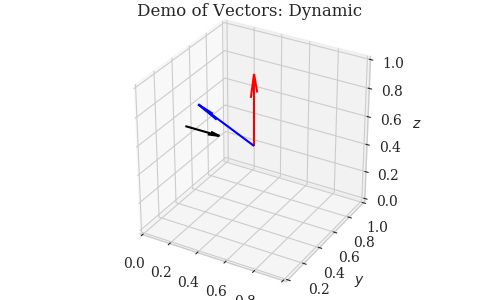
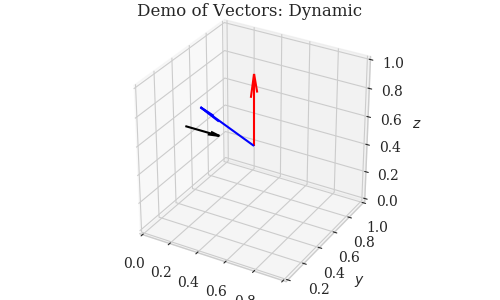
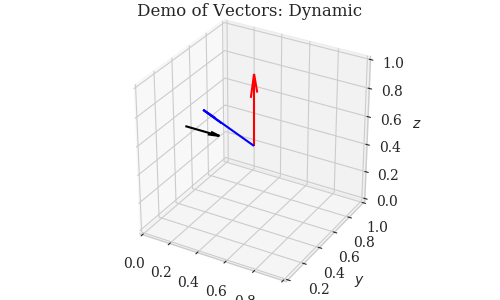
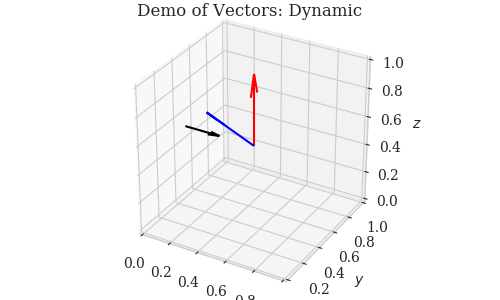
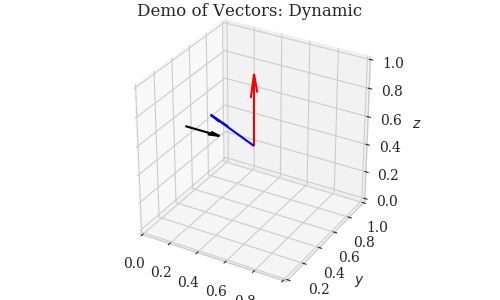
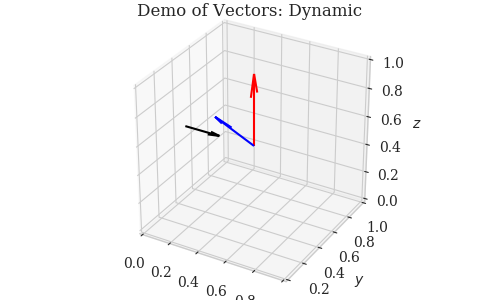
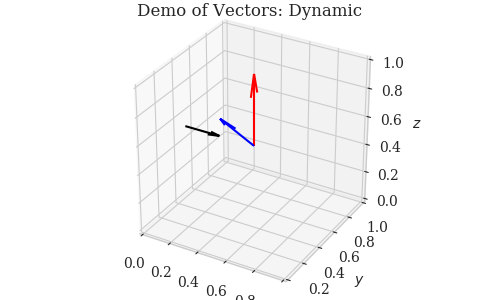
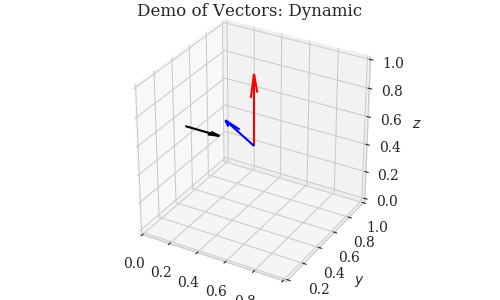
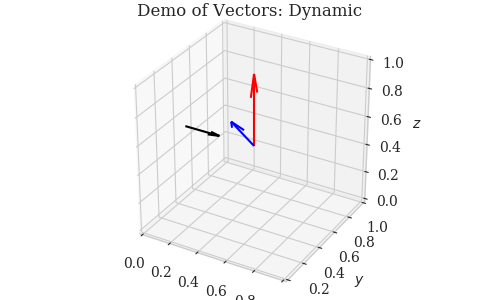
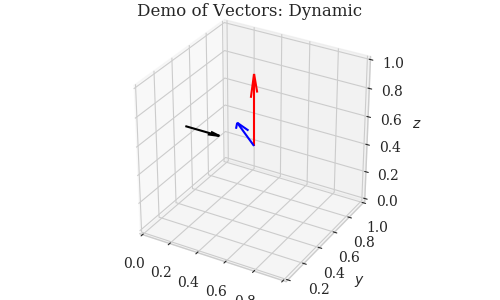
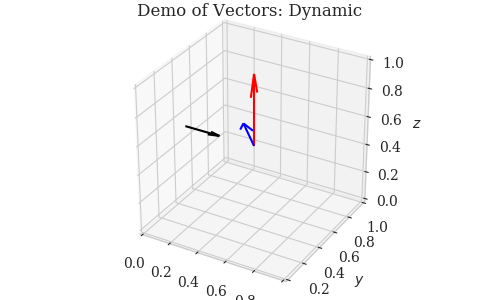
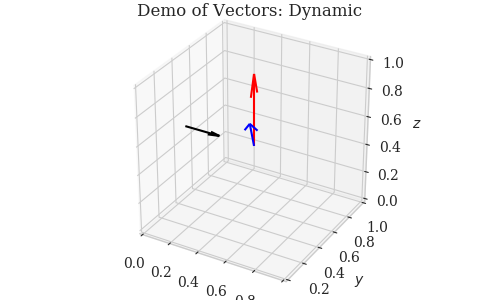
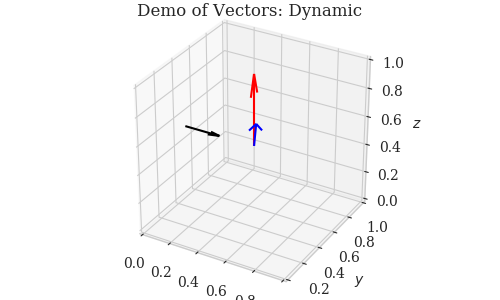
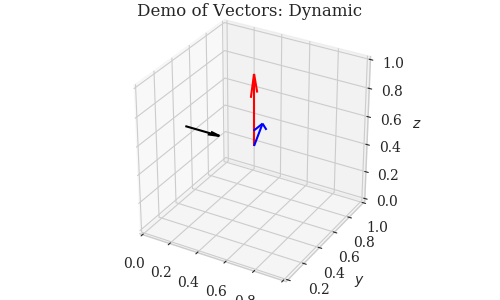
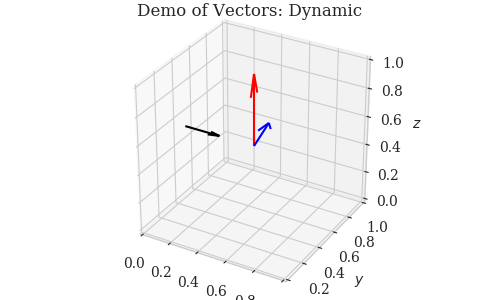
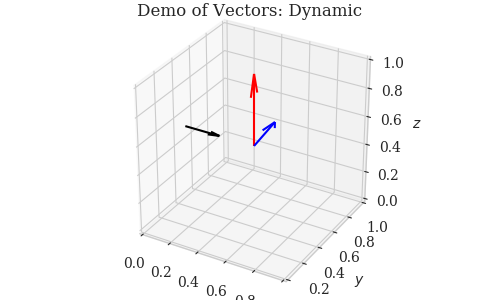
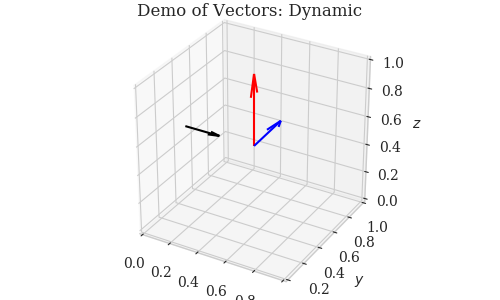
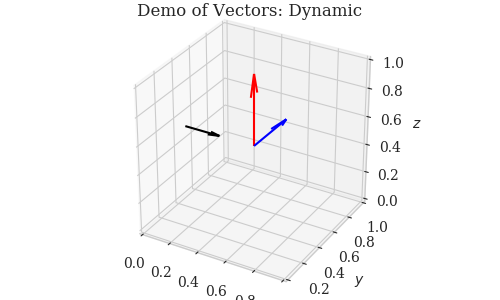
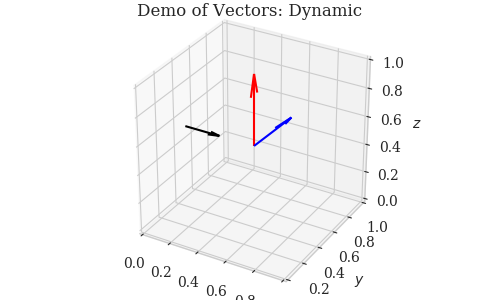
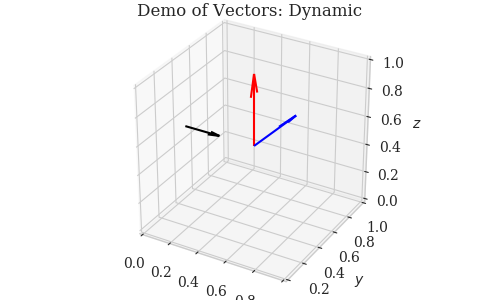
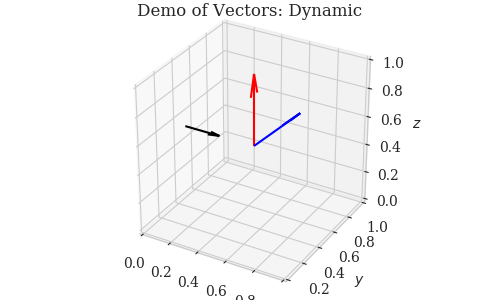
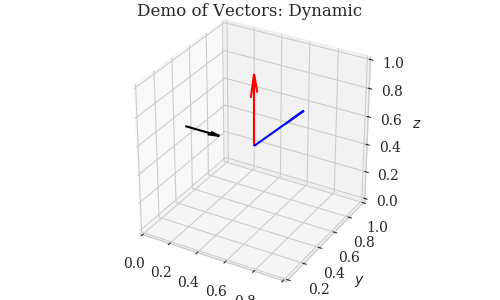
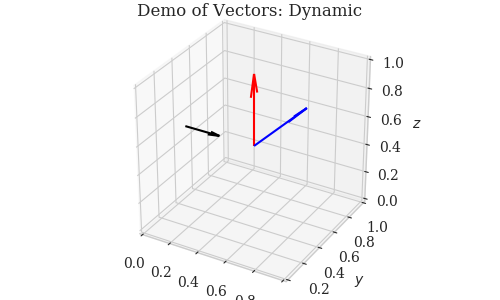
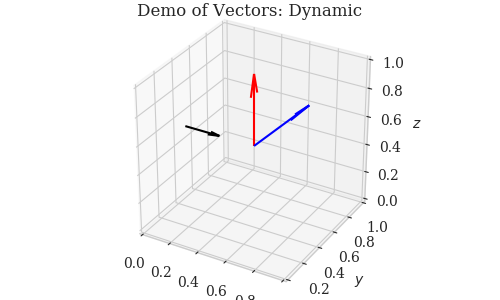
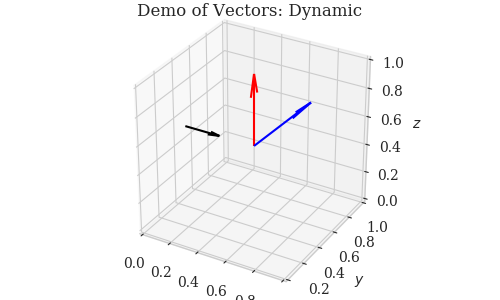
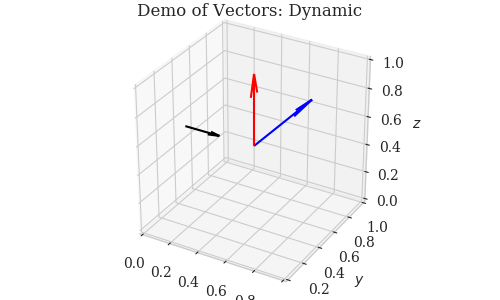
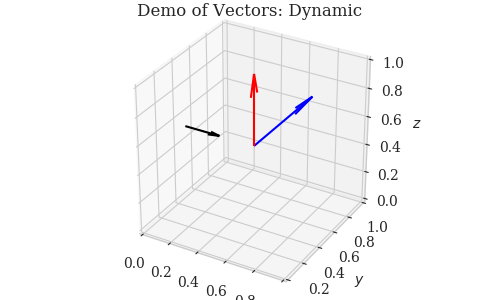
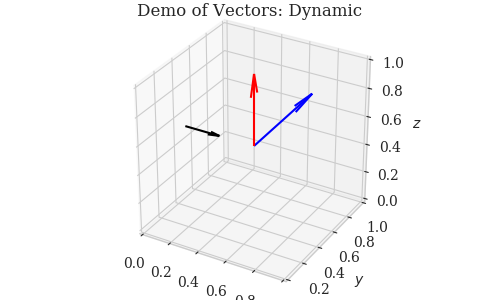
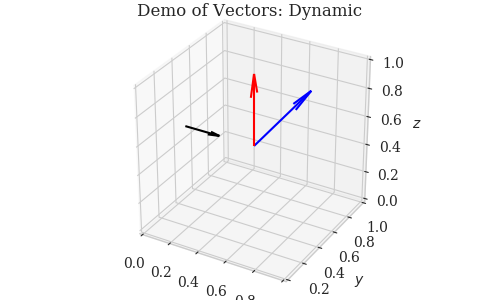
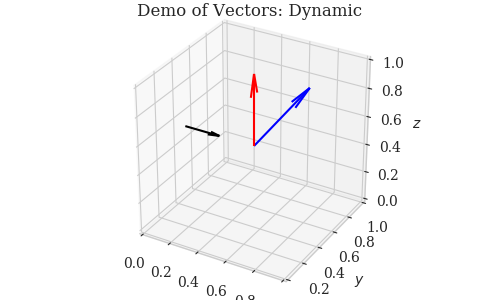
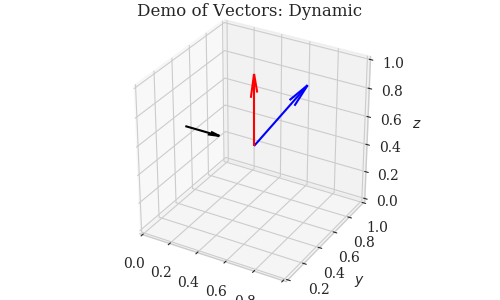
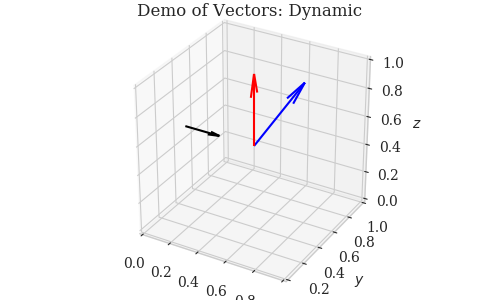
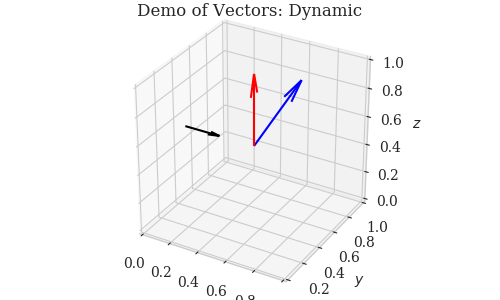
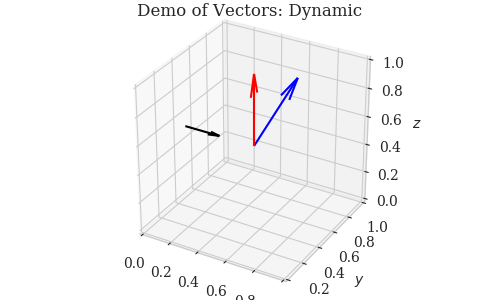
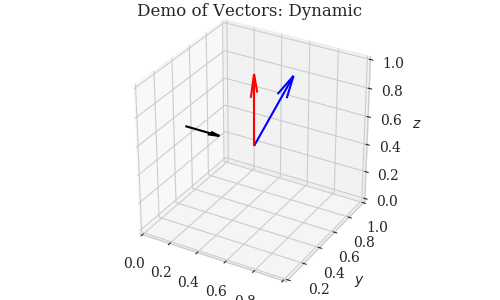
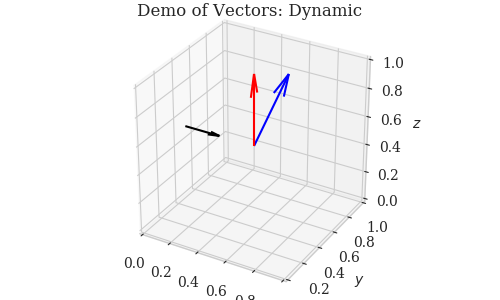
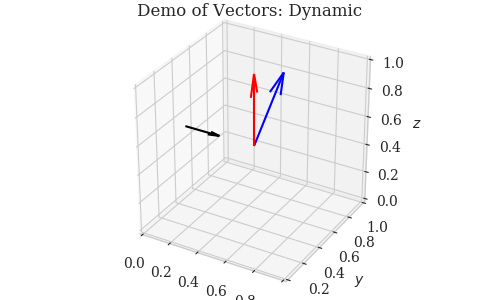
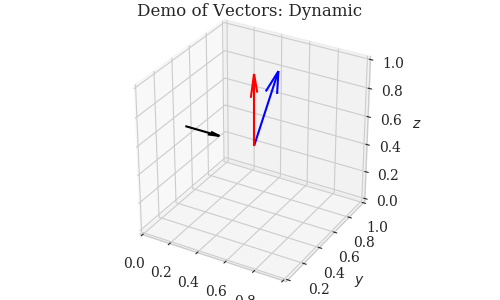
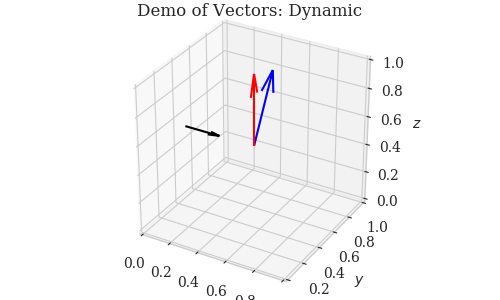
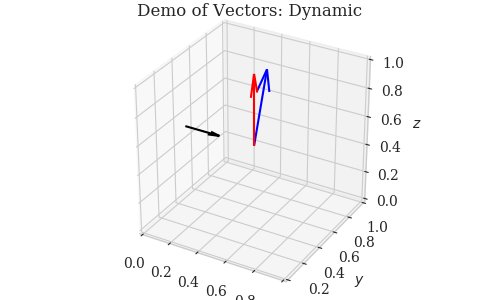
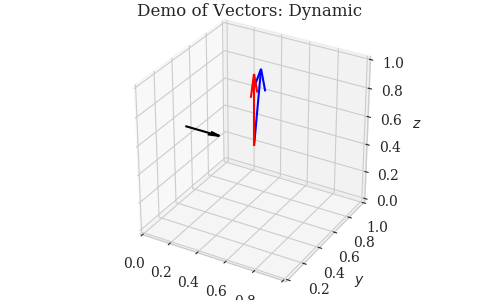
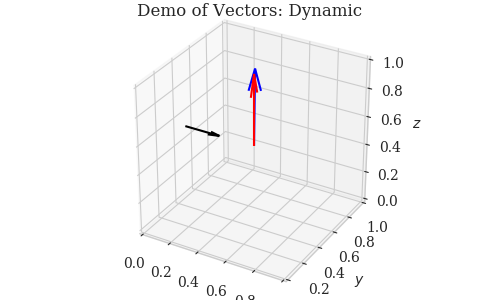
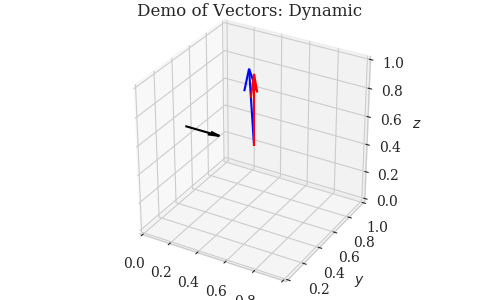
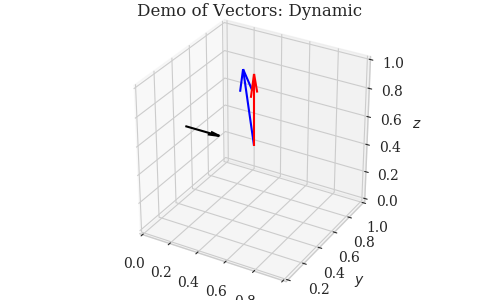
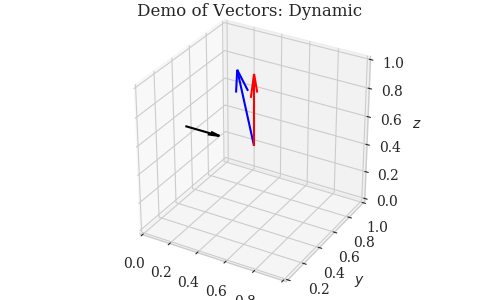
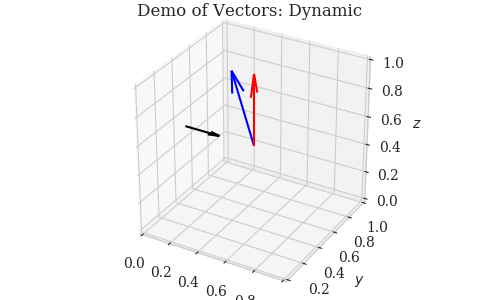
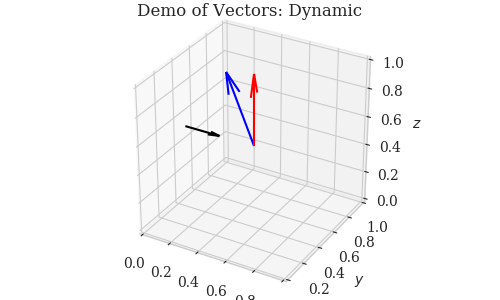
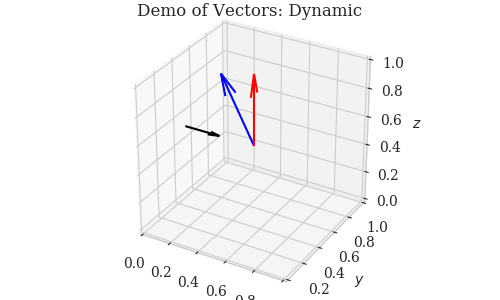
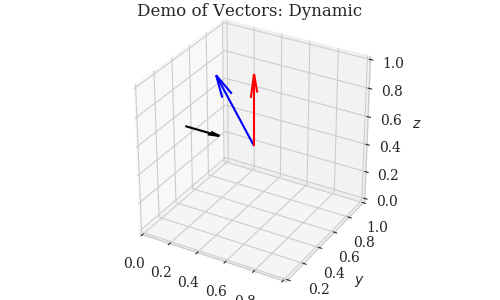
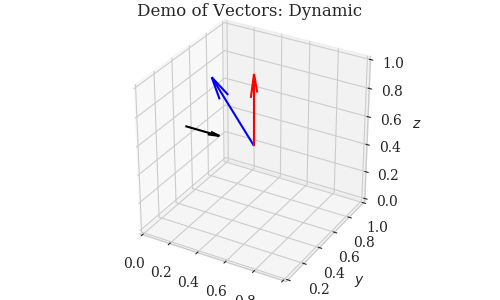
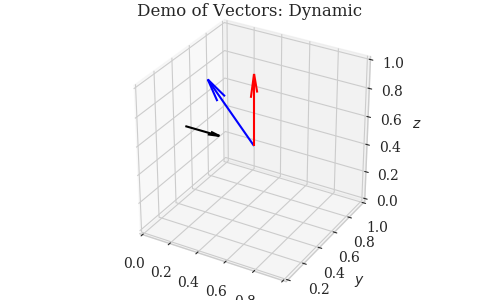
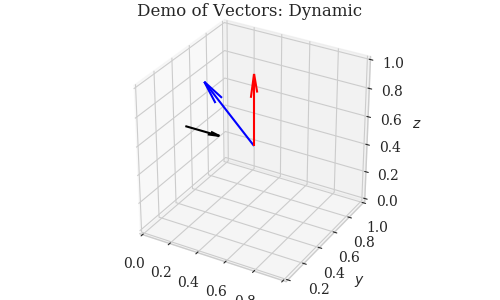

In [4]:
# Demo dynamic 3D
r = 0.5
polar,azimuth = np.deg2rad(0),np.deg2rad(0)
v1 = Vector(np.array([r,polar,azimuth]),
            refPoint=np.array([0.5,0.5,0.5]),
            which='spherical')

fig,ax = draw(vectors=v1,color='red')

ax.set_title("Demo of Vectors: Dynamic");


v2 = v1.rotate(np.deg2rad(45),np.array([0,-1,0]))
arrow_v2 = ax.get_arrow(v2.refPoint,
                        v2.cartesian,color='blue')

r = 0.25
polar,azimuth = np.deg2rad(90),np.deg2rad(0)
v3 = Vector(np.array([r,polar,azimuth]),
            refPoint=np.array([0,0.5,0.5]),
            which='spherical')

arrow_v3 = ax.get_arrow(v3.refPoint,
                        v3.cartesian,color='black')

arrows = [ax.add_collection(arrow_v2),
          ax.add_collection(arrow_v3)]

Nframes = 60
angles = np.linspace(0,2*np.pi,Nframes)

locx = np.linspace(0,1-0.25,Nframes)

def animate(i):
    vtmp2 = v2.rotate(angles[i],v1.cartesian)
    arrow2 = ax.get_arrow(vtmp2.refPoint,vtmp2.cartesian)
    arrows[0].set_segments([arrow2._segments3d[k,:,:] for k in range(3)])
    
    vtmp3 = v3
    vtmp3.translate = np.array([locx[i],0.5,0.5])
    arrow3 = ax.get_arrow(vtmp3.refPoint,vtmp3.cartesian)
    arrows[1].set_segments([arrow3._segments3d[k,:,:] for k in range(3)])
    
    return arrows

anim = animation.FuncAnimation(fig, animate, frames=Nframes, interval=50)

display_animation(anim, default_mode='once')


In [16]:
type(arrow_v2)

mpl_toolkits.mplot3d.art3d.Line3DCollection

In [20]:
print(type(plt.Polygon(0 * P1, fc='g', **kwds)))

<class 'matplotlib.patches.Polygon'>


In [7]:
animate(3)

In [8]:
type(ax)

matplotlib.axes._axes.Axes

<IPython.core.display.Javascript object>


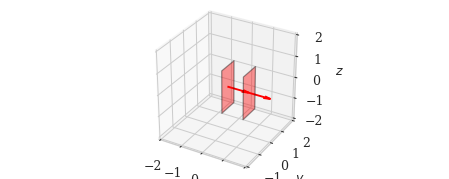

In [25]:
polar, az, Rod, translation = 90, 0, 0, 0;

v = Vector(np.array([1,np.deg2rad(polar),np.deg2rad(az)]))
ctrPoint=np.array(3*[translation])
plane = RectPlane(normalVect=v,ctrPoint=ctrPoint,
    RodriguesAngle=np.deg2rad(Rod),dimensions=[2,1])

fig,ax = draw(figsize=(5,2),xlim=[-2,2],ylim=[-2,2],zlim=[-2,2],
             planes=plane)

In [26]:
plane = plane.translate(np.array([1,0,0]))

draw(figure=fig,axes=ax,planes=plane);

<IPython.core.display.Javascript object>


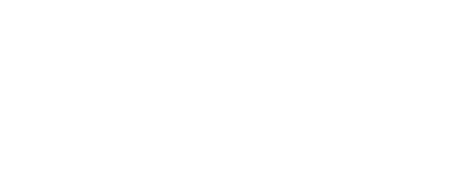


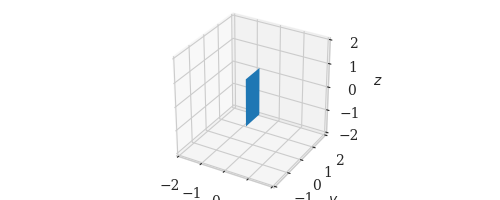
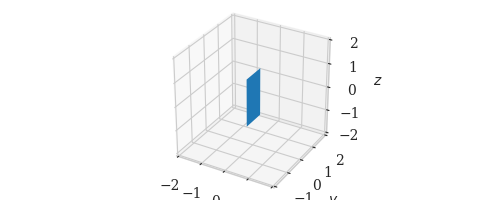
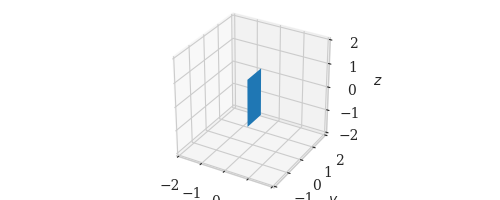
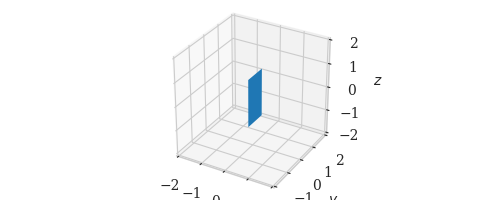
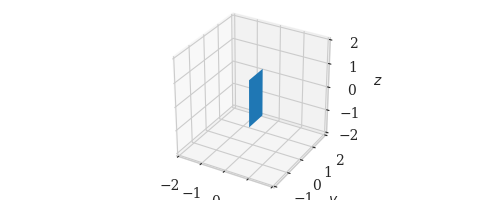
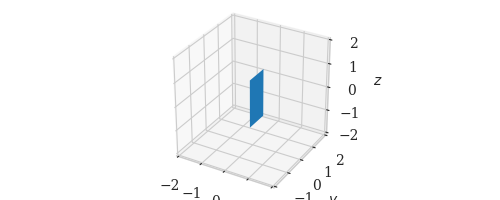
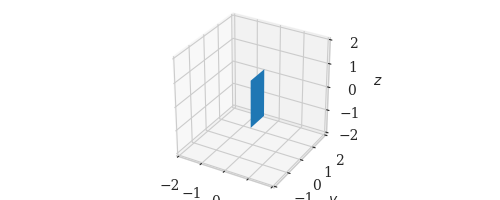
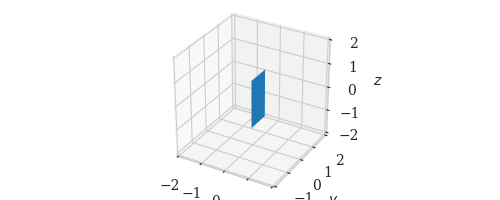
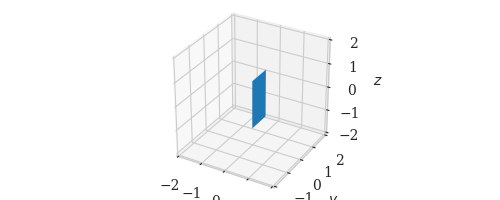
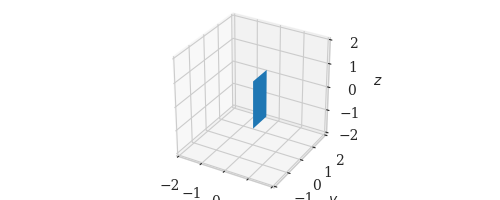
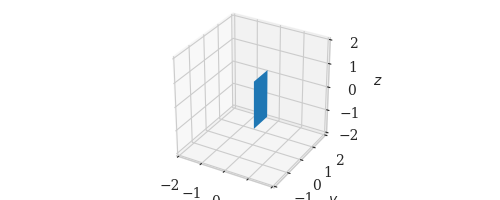
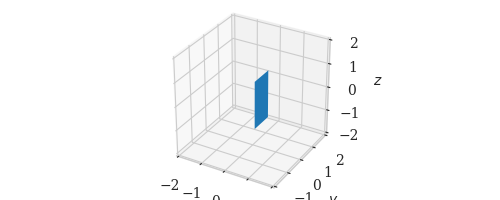
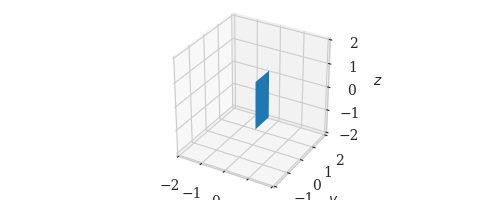
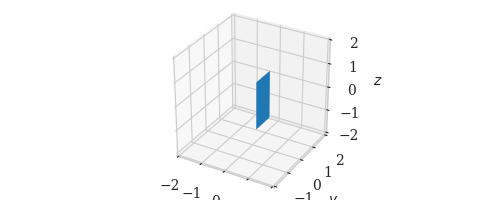
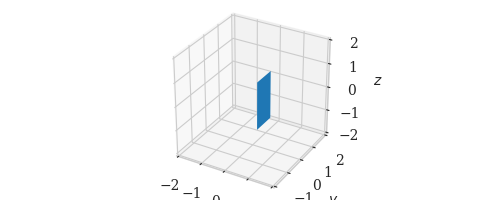
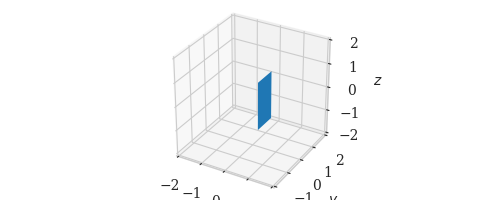
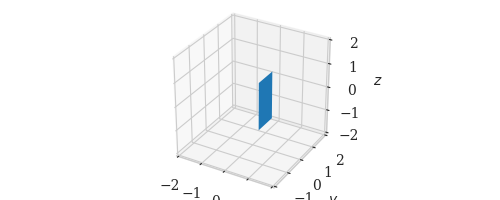
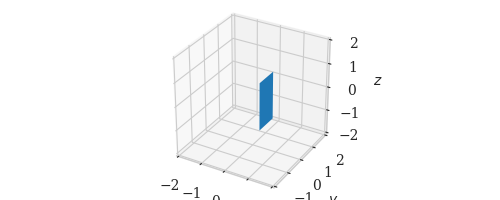
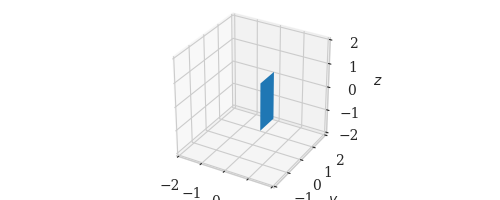
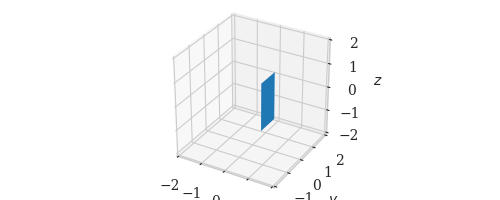
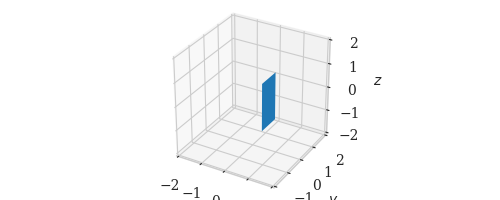
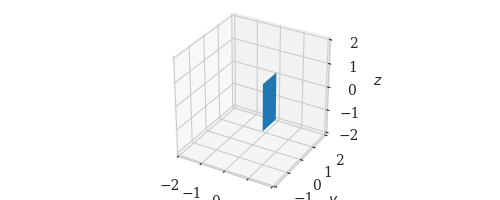
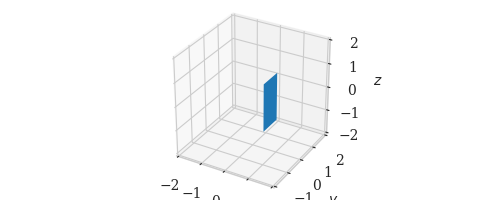
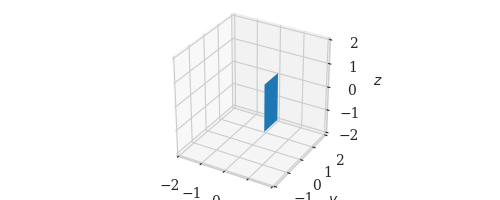
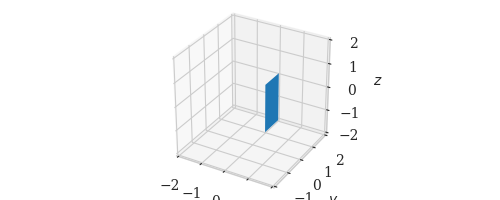
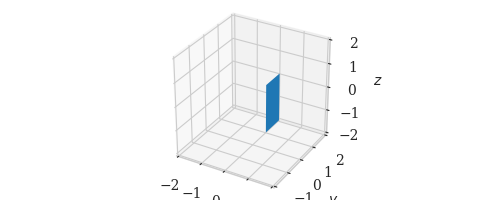
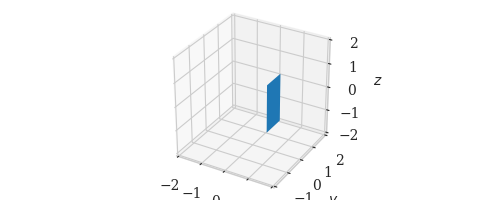
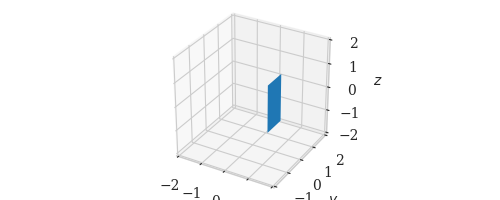
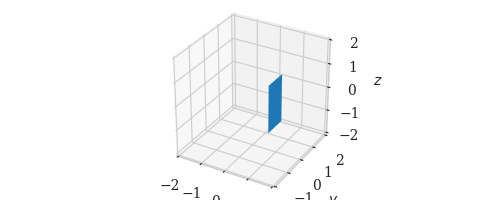
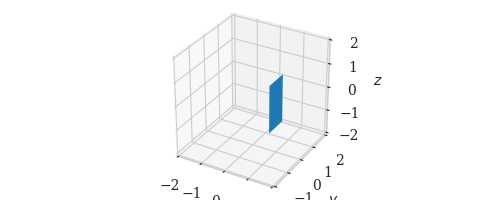
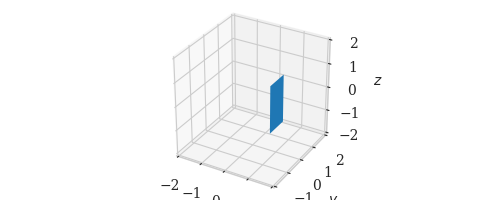
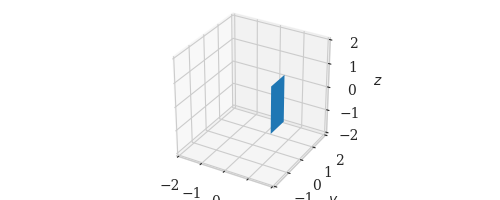
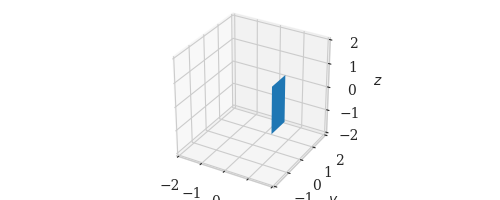
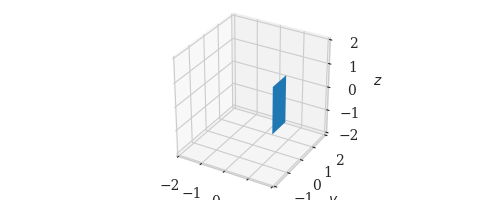
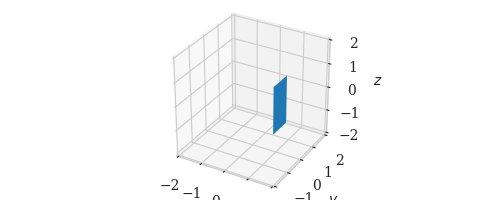
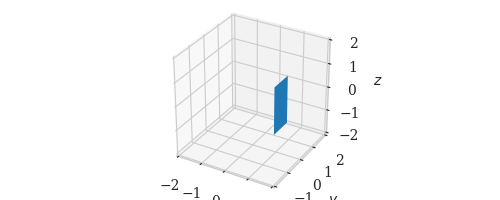
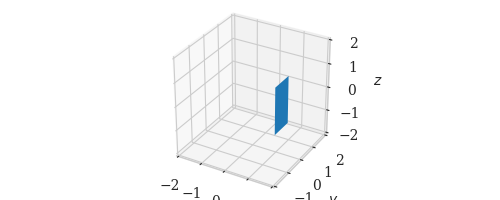
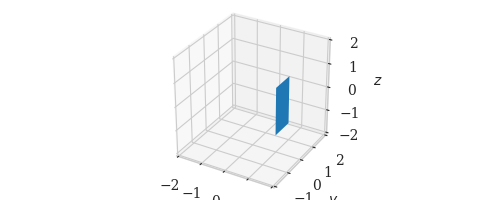
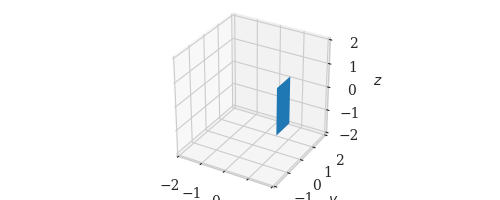
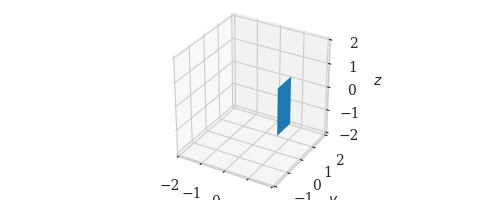
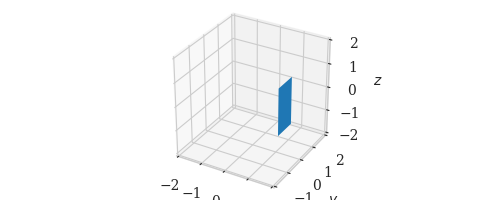
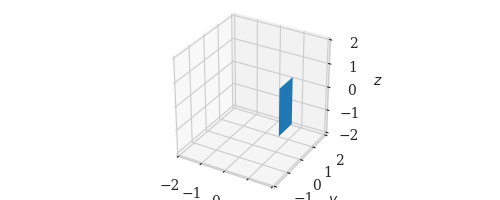
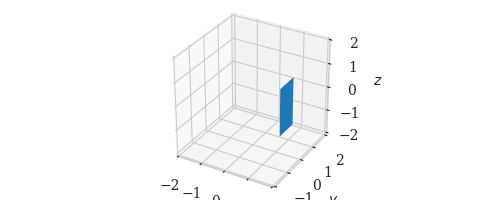
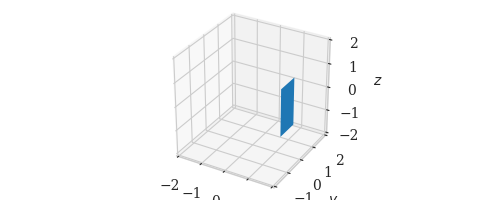
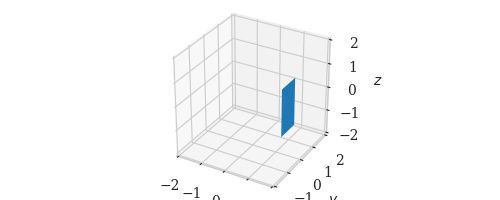
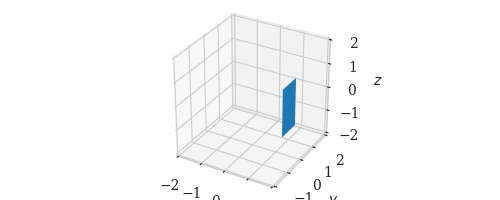
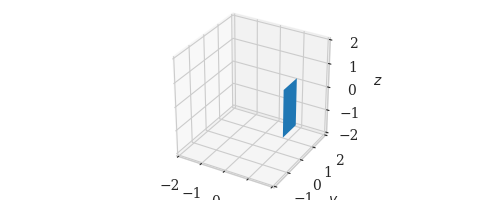
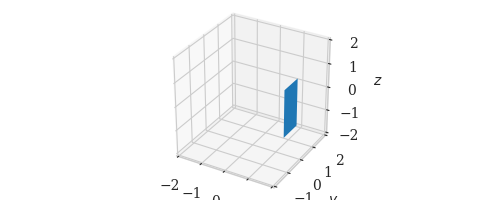
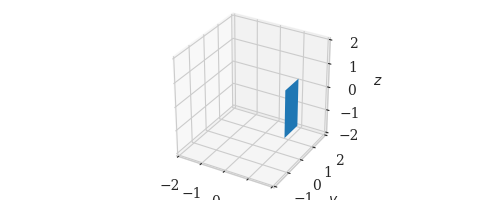
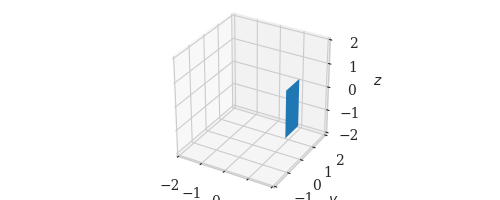
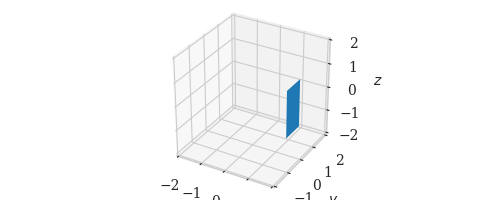
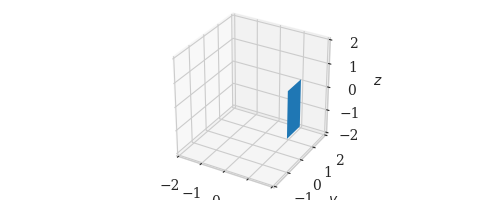
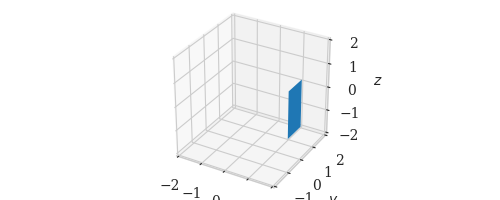
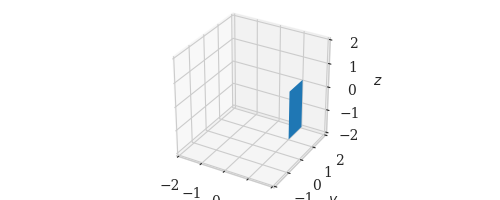
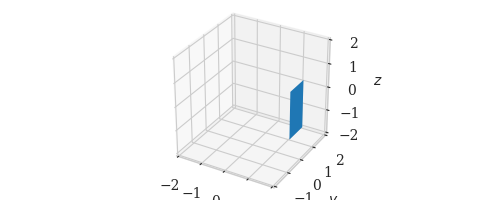
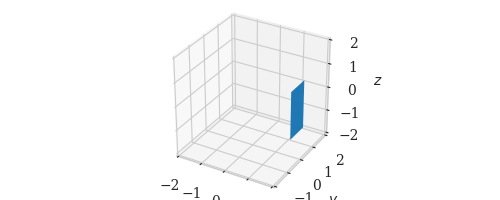
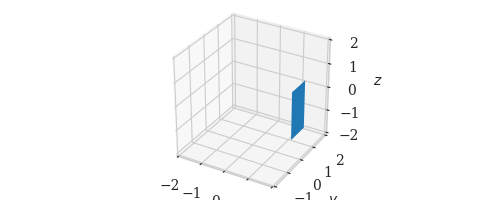
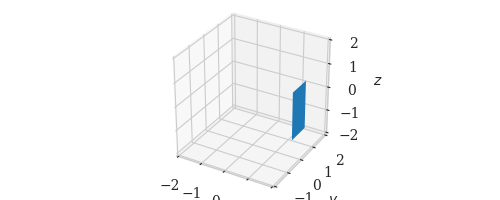
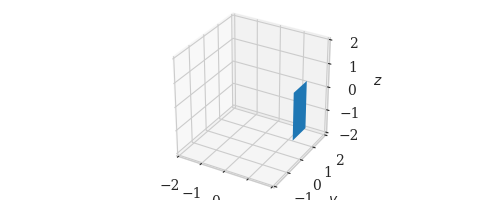
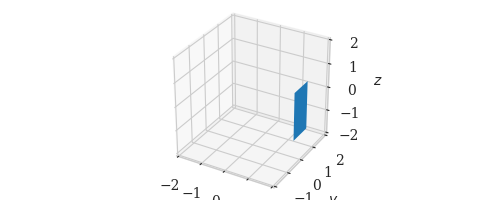

In [45]:
import mpl_toolkits.mplot3d.art3d as art3d

fig,ax = draw(figsize=(5,2),xlim=[-2,2],ylim=[-2,2],zlim=[-2,2])

polar, az, Rod, translation = 90, 0, 0, 0;

v = Vector(np.array([1,np.deg2rad(polar),np.deg2rad(az)]))
ctrPoint=np.array(3*[translation])
plane = RectPlane(normalVect=v,ctrPoint=ctrPoint,
    RodriguesAngle=np.deg2rad(Rod),dimensions=[2,1])

plane = plane.translate(np.array([0,0,0]))
verts = [list(map(lambda vert: (vert[0],vert[1],vert[2]), 
                plane.verts))]
col = art3d.Poly3DCollection(verts)

planes = [ax.add_collection3d(col)]

Nframes = 60

locx = np.linspace(0,2,Nframes)

def animate(i,plane):

    plane = plane.translate(np.array([locx[i],0,0]))
    verts = [list(map(lambda vert: (vert[0],vert[1],vert[2]), 
                    plane.verts))]

    planes[0].set_verts(verts)

#     arrows = [ax.add_collection3d(col)]
    
    return planes

anim = animation.FuncAnimation(fig, animate, fargs=(plane,), frames=Nframes, interval=50)

display_animation(anim, default_mode='once')



In [39]:
planes[0].get_vector

<bound method Poly3DCollection.get_vector of <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x7fc9ef743dd8>>

In [40]:
type(planes[0])

mpl_toolkits.mplot3d.art3d.Poly3DCollection